# Capstone Project - The Battle of the Neighborhoods
## Finding the best location to open a fast food restaurant in Toronto

## Table of Content
#### 1. [Introduction](#intro)
#### 2. [Data](#data)
#### 3. [Methodology](#methodology)
#### 4. [Results and Discussion](#results)
#### 5. [Conclusion](#conclusion)


<a id='intro'></a>
## 1. Introduction
The project is aimed at leveraging the Foursquare location data to solve the problem of identifying the best neighborhood in which to open a new fast food restaurant in Toronto. Details of the project as well as processing of the data used will be described and a neighborhood will be recommended to the client. 

## 1.1 Background Information
One of the many decisions that needs to be made when opening a new business is about the location in which the business should be opened. There are usually a lot of factors that may be considered for a location depending on the specific business. One good pointer as to whether a specific area will be potentially good for a business is to consider if there is a similar business in the same or similar areas to the one being considered. In this project, we will explore how information about different locations can be used to decide where to open a new business. Specifically, we are interested in helping a client find the best location for a new fast food (FF) restaurant in Toronto.

## 1.2 Problem Statement
Our client, Maria is planning to open a new fast food (FF) restaurant in Toronto but needs guidance on the best neighborhood in which she can open the restaurant. Maria is not yet decided on the specific fast food (e.g KFC, McDonalds, Burger King) but she is certain that it will be a fast food restaurant. Based on initial conversations with Maria, she believes that neighborhoods with an existing FF restaurant is a viable option. Neighborhoods that also look similar (in terms of surrounding venues) to another neighborhood with a FF restaurant are also likely to be a good location. However, opening a FF restaurant in a location that already has many FF restaurants or within close proximity to another FF restaurant will create more competition that Maria would prefer to avoid for her new business. Since there are so many neighborhoods, Maria would like to know which neighbourhood is the best location in which to open a new FF restaurant in Toronto.

## 1.3 Target Audience
This project is targeted at helping a client - Maria to know where to open a new FF restaurant in Toronto based on how many restaurants are currently in each neighborhood and the similarity of each neighborhood to ones with existing fast food restaurants. A similar approach to this analysis can be employed to find the best location for other businesses as well.

<a id='data'></a>
## 2. Data
This project uses data from different sources to address the problem stated. Information about neighborhoods in Toronto will be extracted from a web page. Detailed information about the venues in each neighborhood will then be gathered from Foursquare for further processing

### 2.1 Description of Data
The following data are used in the project.
1. Borough and neighborhoods information: This information is gathered by webscraping a wikipedia page (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) that contains a list of the postal codes, borough, and neighborhoods of Toronto. It is then stored in a data frame. 
2. Longitude and Latitude information: In order to explore a neighborhood using Foursquare, we need the latitude and longitude of the locations. There are two ways in which this information could be gathered. The first approach is to make use of the geocoder package, which provides the latitude and longitude of a given location/postal code. The alternative is to use a CSV file in which this information had already been stored (https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv). The project uses this alternative method and reads the latitude and longitude of each neighborhood form the CSV file.
3. Venues in each neighborhood: In order to analyze the neighborhoods in Toronto, we need more information about the venues around each neighborhood. Foursquare location services provide a way to gather this information and will be used to get data on venues in each neighborhood of Toronto. 

Although it is possible to limit our analysis to only neighborhoods with 'Toronto' in its name, we decided against this in order to have more neighborhood venues to be explored for the best location for a FF restaurant. 

### 2.2 How the Data will be used
The data will be used to arrive at a recommendation of a neighbourhood where a new FF restaurant is best located. 

We will start out with a data frame containing all the neighbourhoods in Toronto. Latitudes and Longitudes of the neighborhoods will then be added to the data frame. This information will be used to query Foursquare location services to obtain venues in each neighborhood. Each venue usually belongs to a venue category in the obtained data. For the purpose of the project, we are particularly interest in the Fast Food Restaurant category since it describes exactly the business that our client is interested in opening. However, to better understand the neighborhoods and how similar they are to each other, the complete set of data for all neighborhoods and venue categories will be used to cluster the neighborhoods into groups of similar neighborhoods.

Using the data frame that contains the complete list of venues in each neighborhood, we do some data cleaning to prepare the data for one-hot ending of the venue categories. We will then use the resulting data of one-hot encoding to do some exploratory analysis to see some of the most common venues in each neighborhood. In order to identify neighborhoods that are similar to one another, the _k_-means model will be used to cluster the neighborhood into a number of clusters. The method employed to identify the best number for _k_ is the Elbow method. 

Throughout the project report, we will use plots and Folium maps for visual exploratory analysis and understanding of the neighborhoods and other data.

Once we have the clusters defined, we will explore each cluster more closely and find the average number of FF restaurants in each cluster. Our goal is to find the top 2 clusters with the highest average number of restaurants within the cluster. We decided to use the top 2 clusters in order to have more neighborhoods to further explore. Although having highest average number of FF restaurants in a cluster would imply that there is demand for fast food in that cluster, we also want to limit the amount of competition that the business would face when opened in a neighborhood within the cluster. To find the best neighborhood for the business, we will calculate a distance matrix to show the distance between neighborhoods with no existing FF restaurant and those with at least one FF restaurant within the best clusters earlier identified. Distance to neighborhoods with multiple FF restaurant will be multiplied by the number of restaurants in the neighborhood for a better analysis of the competition that may be faced. Finally we find the maximum average distance across all neighborhoods that currently have no FF restaurant but which are within the best clusters identified. The maximum average distance implies that it has the least amount of competition with existing FF restaurants that are in the best clusters earlier identified but it is still within a neighborhood where FF restaurants are in high demand. 

The analysis will lead to the identification of the best 2 neighborhoods in which our client may open a new fast food restaurant in Toronto. The neighborhoods are shown on the map together with other neighborhoods and their clustering. Neighborhoods with existing fast food restaurants will also be identified on the final map for a visual identification of the best neighborhoods found for the new business.



<a id='data-gathering'></a>
### 2.3 Data Gathering

In [1]:
!pip install bs4 
!pip install geocoder
!pip install geopy
!pip install folium

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: 

In [2]:
#conda install -c districtdatalabs yellowbrick
!pip install yellowbrick

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


#### Install and import packages

In [3]:
# Import libraries
from bs4 import BeautifulSoup 
import requests  
import pandas as pd
import numpy as np 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from geopy.geocoders import Nominatim 
import geocoder
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import folium 
import yellowbrick
print('Libraries imported.')

Libraries imported.


#### Get Borough and Neighborhood information 


In [4]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" #the url containing the data
page  = requests.get(url).text # get the page
soup = BeautifulSoup(page,"html5lib") # create a soup object using the variable 'page'
table = soup.find('table') # the data is in the first table so we can use find method  

df = pd.DataFrame(columns=["PostalCode", "Borough", "Neighborhood"])
for row in table.findAll('td'):
    if row.span.text=='Not assigned':
        pass
    else:
        postalCode = row.p.text[:3]
        borough = (row.span.text).split('(')[0]
        neighbor = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        df = df.append({"PostalCode":postalCode, "Borough":borough, "Neighborhood":neighbor}, ignore_index=True)
# Rename some of the Boroughs
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})


In [5]:
print("The neighborhood information: \n")
df

The neighborhood information: 



,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [6]:
df.shape

(103, 3)

We see that there are 103 neighborhoods in Toronto.

In [7]:
# We could also the data to only locations with Toronto in the name 
# data = df.loc[df['Borough'].str.contains("Toronto", case =False)]
# data.reset_index(inplace=True,drop=True)
# df = data
# df

We could limit the neighborhoods to only those with Toronto in the name but we decided to use the whole neighborhood in order to have more options. As it turns out, including or excluding some of the result yielded exactly the same result at the end of the analysis and this further confirms our final choice of neighborhood to open the new fast food restaurant. 

#### Getting Longitude and latitude information

In order to explore the neighborhoods using Foursquare location data, we need the latitude and longitude of each neighborhood. One option for getting these information is to use the function below and execute over the range of the neighborhoods. However, a CSV file containing the longitude and latitudes of these locations is available. We read the location information from this file and update the data frame to contain the latitude and longitude for each data frame.

In [8]:
#Function to get longitude and latitudes
#def get_coordinates(postalcode, borogh):
#    lat_lng_coords = None
#    while(lat_lng_coords is None):
#        g = geocoder.arcgis('{}, {}'.format(postalcode, borogh))
#        lat_lng_coords = g.latlng
#        latitude = lat_lng_coords[0]
#        longitude = lat_lng_coords[1]
#    return latitude, longitude



In [9]:
#for rownum in range(0,len(df)):
#    postalCode = df.loc[rownum, 'PostalCode'] 
#    borough = df.loc[rownum, 'Borough'] 
#    print("Getting coordinates for {} ({})".format(postalCode,borough))
#    latitude, longitude = get_coordinates(postalCode, borough)
#    df.loc[rownum, 'Latitude'] = latitude
#    df.loc[rownum, 'Longitude'] = longitude

In [11]:
# Alternatively get coordinates from here
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv'
df_coord = pd.read_csv(path)

df_coord.columns = ["PostalCode", "Latitude", "Longitude"]
print("The coordinates information:")
df_coord


The coordinates information:


,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [12]:
print("The shape of the coordinates information from the file: ",df_coord.shape)


The shape of the coordinates information from the file:  (103, 3)


The coordinates are merged to the neighborhod information as shown below.

In [13]:
df = pd.merge(df, df_coord, on='PostalCode')
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [14]:
df.shape

(103, 5)

The resulting data consist of the complete 103 neighborhood with their coordinate information added.

#### Getting Venues in each Neighbourhood from Foursquare

We query Foursquare for the venues in each neighborhood. To do this we define a function to retrieve venues for each location in our data frame.

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
RADIUS = 500


In [17]:
# Function to get nearby venues for given latitude and longitude 
def getNearbyVenues(postalCode, boroughs, names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for code, borough, name, lat, lng in zip(postalCode, boroughs, names, latitudes, longitudes):
        print("Getting venues for {} {} ({})".format(code, borough, name))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            code,
            borough,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['PostalCode',
                'Borough',
                'Neighborhood', 
                'Neighborhood Latitude', 
                'Neighborhood Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category']
    
    return(nearby_venues)

In [18]:
toronto_venues = getNearbyVenues(postalCode=df['PostalCode'],
                                 boroughs=df['Borough'],
                                 names=df['Neighborhood'],
                                 latitudes=df['Latitude'],
                                 longitudes=df['Longitude']
                                )

Getting venues for M3A North York (Parkwoods)
Getting venues for M4A North York (Victoria Village)
Getting venues for M5A Downtown Toronto (Regent Park, Harbourfront)
Getting venues for M6A North York (Lawrence Manor, Lawrence Heights)
Getting venues for M7A Queen's Park (Ontario Provincial Government)
Getting venues for M9A Etobicoke (Islington Avenue)
Getting venues for M1B Scarborough (Malvern, Rouge)
Getting venues for M3B North York (Don Mills North)
Getting venues for M4B East York (Parkview Hill, Woodbine Gardens)
Getting venues for M5B Downtown Toronto (Garden District, Ryerson)
Getting venues for M6B North York (Glencairn)
Getting venues for M9B Etobicoke (West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale)
Getting venues for M1C Scarborough (Rouge Hill, Port Union, Highland Creek)
Getting venues for M3C North York (Don Mills South)
Getting venues for M4C East York (Woodbine Heights)
Getting venues for M5C Downtown Toronto (St. James Town)
Getting venues fo

In [19]:
print("Venue information sample: \n")
toronto_venues.head()

Venue information sample: 



,PostalCode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,North York,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,M3A,North York,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,M3A,North York,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,M4A,North York,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,M4A,North York,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [20]:
(rows, columns) =  toronto_venues.shape
print("We obtained a total of {} venues for all the neighborhoods".format(rows))

We obtained a total of 2136 venues for all the neighborhoods


The data frame called toronto_venues now contains the complete set of data that will be using to make recommendation regarding where to open a fast food restaurant. 

<a id='methodology'></a>
## 3. Methodology
In this section, we describe the major part of the project. Exploratory data analysis was done to better understand the different neighborhoods, the venues in them and other details about the venue. Machine learning techniques is applied in our analysis to arrive at a solution to the stated problem.

### 3.1 Exploratory Data Analysis 
In our data exploration, we will look at the categories to better understand each category. But we can already see from the sample above that there is a Fast Food category, which is exactly the category for the business that our client wants to open. We will explore further to see how many neighborhoods have each of the categories, the total number of distinct categories of venues and the number of fast food restaurants in each neighborhood. 

**Total number of venue categories in all the neighborhoods**

In [21]:
toronto_venues.groupby('Venue Category').count()

,PostalCode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,,,
Accessories Store,2,2,2,2,2,2,2,2
Adult Boutique,1,1,1,1,1,1,1,1
Airport,2,2,2,2,2,2,2,2
Airport Food Court,1,1,1,1,1,1,1,1
Airport Gate,1,1,1,1,1,1,1,1
Airport Lounge,2,2,2,2,2,2,2,2
Airport Service,3,3,3,3,3,3,3,3
Airport Terminal,2,2,2,2,2,2,2,2
American Restaurant,19,19,19,19,19,19,19,19


Reviewing the categories above show that there is a category called 'Neighborhood'. Since we already have a column called 'Neighborhood' in our dataset, we will rename this category to 'Neighborhood Area' to avoid confusion. 

In [22]:
toronto_venues.loc[toronto_venues['Venue Category'].str.contains("Neighborhood", case =False), 'Venue Category'] = "Neighborhood Area"

Check that they have been changed 

In [23]:
toronto_venues.loc[toronto_venues['Venue Category'].str.contains("Neighborhood Area", case =False), 'Venue Category'] 

360     Neighborhood Area
603     Neighborhood Area
791     Neighborhood Area
1265    Neighborhood Area
Name: Venue Category, dtype: object

**Total number of distinct categories**

In [24]:
print('There are {} unique categories in the venues data.'.format(len(toronto_venues['Venue Category'].unique())))

There are 274 unique categories in the venues data.


**Total number of fast food restaurants in the neighbourhoods**

In [25]:
print("The total number of fast food restaurants in neighborhoods with wat least 1.")
ff_restaurants = (toronto_venues[toronto_venues['Venue Category']=='Fast Food Restaurant'].groupby('Neighborhood').count()).reset_index()[['Neighborhood', 'Venue Category']]
ff_restaurants.columns=['Neighborhood', 'No_of_restaurants']
ff_restaurants

The total number of fast food restaurants in neighborhoods with wat least 1.


,Neighborhood,No_of_restaurants
0,"Bedford Park, Lawrence Manor East",1
1,Church and Wellesley,2
2,"Clarks Corners, Tam O'Shanter, Sullivan",2
3,"Commerce Court, Victoria Hotel",1
4,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",1
5,Enclave of M4L,1
6,Enclave of M5E,1
7,"Fairview, Henry Farm, Oriole",4
8,"Garden District, Ryerson",2
9,"High Park, The Junction South",1


**View existing fast food restaurants on the map**

To view exsiting fast food restaurants on the map, we first get the coordinate for Toronto, so that the map can be centred on Toronto. This information is obtained with geopy.

In [26]:
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="toronto_explore")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [27]:
# Get the list of fast food restaurants from the venues data
restaurants = toronto_venues[toronto_venues['Venue Category']=='Fast Food Restaurant']
restaurants

,PostalCode,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,M3A,North York,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
97,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
136,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Crepe Delicious,43.654536,-79.380889,Fast Food Restaurant
156,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Bourbon St. Grill,43.655135,-79.380823,Fast Food Restaurant
545,M2H,North York,Hillcrest Village,43.803762,-79.363452,New York Fries,43.803664,-79.363905,Fast Food Restaurant
586,M4H,East York,Thorncliffe Park,43.705369,-79.349372,A&W,43.706275,-79.344670,Fast Food Restaurant
649,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,The Burger's Priest,43.648643,-79.387539,Fast Food Restaurant
739,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,McDonald's,43.778407,-79.343574,Fast Food Restaurant
741,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,KFC,43.777600,-79.344200,Fast Food Restaurant
748,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Bourbon St. Grill,43.778276,-79.343241,Fast Food Restaurant


In [28]:
# create map showing clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to the map
for lat, lon, venue in zip(restaurants['Venue Latitude'], restaurants['Venue Longitude'], restaurants['Venue']):
    label = folium.Popup(str(venue), parse_html=True)
    folium.Marker(
        [lat, lon],
        popup=label    
    ).add_to(map_clusters)
       
map_clusters

### 3.2 Analyzing the Neighborhoods
In our analysis of the neighborhood, we use one-hot encoding to identify how many of each venue category are in each neighbourhood. We also use the encoding to further analyze each neighborhood to see which venues are the 10 most common in the neighborhoods. 

**One hot encoding**

In [29]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()


,Neighborhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood Area,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [30]:
toronto_onehot.shape

(2136, 275)

Next we reset the index and confirm the shape of the resulting data frame.

In [31]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').count().reset_index()
toronto_grouped

,Neighborhood,Accessories Store,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood Area,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4

In [32]:
toronto_grouped.shape


(98, 275)

**Finding the most common venues in each neighborhood**

Knowing the most common venues in east neighborhood gives us an idea of what the neighborhood might look like. To do this, we define a function to sort venues in descending order, create the new dataframe and display the top 10 venues for each neighborhood.

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
1,"Alderwood, Long Branch",Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
2,"Bathurst Manor, Wilson Heights, Downsview North",Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
3,Bayview Village,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
4,"Bedford Park, Lawrence Manor East",Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium


### 3.3 Clustering the Neighborhoods
In order to find neighbor hoods that are similar in terms of venues in the neighborhood we will create a cluster of neighborhoods using _k_-means algorithm. Using this algorithm requires that a value if provided for _k_. Since we do not know how well to cluster the neighborhoods or how many clusters is most suitable. We employ the Elbow method to find the best value of _k_ and then cluster the neighborhood into this number of clusters.


#### Best value of k for k-means
Since our target business is a fast food restaurant, we choose the data on fast food restaurant to determine the best way to cluster the neighbourhoods. 

In [35]:
ff_data = toronto_grouped[["Fast Food Restaurant"]]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


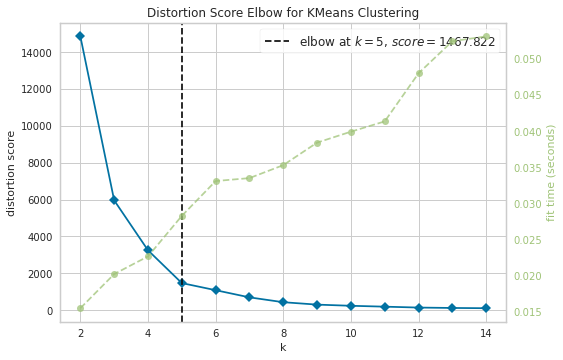

In [36]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,15))
visualizer.fit(ff_data)        # Fit the data to the visualizer
visualizer.show()

The graph shows 5 as the best k value being the elbow point. We will run _k_-means to cluster the neighborhood into 5 clusters.

In [37]:
# set number of clusters
kclusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([4, 4, 0, 4, 0, 1, 4, 0, 0, 4, 4, 1, 0, 1, 4, 0, 4, 2, 3, 4, 4, 4,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 2, 4, 1, 2, 4, 2, 4, 4, 4, 2, 0, 4, 4,
       4, 4, 0, 4, 1, 4, 0, 4, 3, 3, 4, 4, 0, 0, 4, 0, 4, 4, 3, 0, 0, 4,
       3, 2, 4, 4, 4, 3, 4, 4, 0, 1, 3, 0, 3, 0, 0, 4, 4, 3, 4, 0, 2, 3,
       4, 4, 4, 4, 3, 4, 4, 4, 4, 4], dtype=int32)

Create a new dataframe that includes the clusters labels (0, 1, 2, 3, or 4) as well as the top 10 venues for each neighborhood.

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [39]:
# join venue data
toronto_merged = df
# merge data
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood', how ='inner')
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
1,M4A,North York,Victoria Village,43.725882,-79.315572,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
7,M3B,North York,Don Mills North,43.745906,-79.352188,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium
10,M6B,North York,Glencairn,43.709577,-79.445073,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium


In [40]:
toronto_merged.shape

(98, 16)

We want to see the actual number of fast food restaurants in each neighbourhood together with the cluster information in order to decide the best location to open a new fast food restaurant.

In [41]:
ff_restaurants = (toronto_venues[toronto_venues['Venue Category']=='Fast Food Restaurant'].groupby('Neighborhood').count()).reset_index()[['Neighborhood', 'Venue Category']]
ff_restaurants.columns=['Neighborhood', 'No_of_restaurants']
ff_restaurants

,Neighborhood,No_of_restaurants
0,"Bedford Park, Lawrence Manor East",1
1,Church and Wellesley,2
2,"Clarks Corners, Tam O'Shanter, Sullivan",2
3,"Commerce Court, Victoria Hotel",1
4,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",1
5,Enclave of M4L,1
6,Enclave of M5E,1
7,"Fairview, Henry Farm, Oriole",4
8,"Garden District, Ryerson",2
9,"High Park, The Junction South",1


In [42]:
#merge data
toronto_merged = pd.merge(toronto_merged, ff_restaurants, how='left')
toronto_merged['No_of_restaurants'] = toronto_merged['No_of_restaurants'].fillna(0)

In [43]:
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,No_of_restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
5,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
6,M3B,North York,Don Mills North,43.745906,-79.352188,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
7,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
8,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,2.0
9,M6B,North York,Glencairn,43.709577,-79.445073,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0


We can now visualilze the clusters on the map. Similar colors shows that the neighborhoods are in the same clustering, inferring that such neighborhoods are quite similar in terms of venues in them.

In [44]:
# create map showing clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

#### Examining each cluster

Now we will examine each cluster closely and calculate the average number of restaurant in each cluster. We are interested in the cluster with the highest average number of restaurant since this indicates that fast food (FF) restaurant is common in the cluster. The number of restaurant in each neighborhood is also shown in the tables.

#### Cluster 0

In [45]:
cluster0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0,1, 2,3, 4] + list(range(5, toronto_merged.shape[1]))]]
cluster0

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,No_of_restaurants
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
7,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
12,M3C,North York,Don Mills South,43.725900,-79.340923,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
24,M6G,Downtown Toronto,Christie,43.669542,-79.422564,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
27,M3H,North York,"Bathurst Manor, Wilson Heights, Downsview North",43.754328,-79.442259,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
28,M4H,East York,Thorncliffe Park,43.705369,-79.349372,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
30,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
42,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
45,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
53,M5M,North York,"Bedford Park, Lawrence Manor East",43.733283,-79.419750,0,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0


In [46]:
print("Cluster 0 has {} fast food restaurants.".format(cluster0['No_of_restaurants'].sum())) 
print("Cluster 0 has an average of {} fast food restaurants per neighbourhood.".format(cluster0['No_of_restaurants'].mean())) 

Cluster 0 has 12.0 fast food restaurants.
Cluster 0 has an average of 0.5217391304347826 fast food restaurants per neighbourhood.


#### Cluster 1

In [47]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0,1,2,3,4] + list(range(5, toronto_merged.shape[1]))]]
cluster1

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,No_of_restaurants
14,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
19,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
23,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,1,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
32,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,1,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,4.0
80,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
94,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,2.0


In [48]:
print("Cluster 1 has {} fast food restaurants.".format(cluster1['No_of_restaurants'].sum())) 
print("Cluster 1 has an average of {} fast food restaurants per neighbourhood.".format(cluster1['No_of_restaurants'].mean())) 

Cluster 1 has 6.0 fast food restaurants.
Cluster 1 has an average of 1.0 fast food restaurants per neighbourhood.


#### Cluster 2

In [49]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0,1,2,3,4] + list(range(5, toronto_merged.shape[1]))]]
cluster2

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,No_of_restaurants
8,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,2.0
29,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
35,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
41,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
46,M5L,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
88,M5W,Downtown Toronto Stn A,Enclave of M5E,43.646435,-79.374846,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
92,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0


In [50]:
print("Cluster 2 has {} fast food restaurants.".format(cluster2['No_of_restaurants'].sum())) 
print("Cluster 2 has an average of {} fast food restaurants per neighbourhood.".format(cluster2['No_of_restaurants'].mean())) 

Cluster 2 has 6.0 fast food restaurants.
Cluster 2 has an average of 0.8571428571428571 fast food restaurants per neighbourhood.


#### Cluster 3

In [51]:
cluster3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0,1,2,3,4] + list(range(5, toronto_merged.shape[1]))]]
cluster3

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,No_of_restaurants
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
22,M4G,East York,Leaside,43.709060,-79.363452,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
36,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
40,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
52,M4M,East Toronto,Studio District,43.659526,-79.340923,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
57,M2N,North York,Willowdale South,43.770120,-79.408493,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
76,M4S,Central Toronto,Davisville,43.704324,-79.388790,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
77,M5S,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
78,M6S,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,3,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0


In [52]:
print("Cluster 3 has {} fast food restaurants.".format(cluster3['No_of_restaurants'].sum())) 
print("Cluster 3 has an average of {} fast food restaurants per neighbourhood.".format(cluster3['No_of_restaurants'].mean())) 

Cluster 3 has 1.0 fast food restaurants.
Cluster 3 has an average of 0.09090909090909091 fast food restaurants per neighbourhood.


#### Cluster 4

In [53]:
cluster4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0,1,2,3,4] + list(range(5, toronto_merged.shape[1]))]]
cluster4

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,No_of_restaurants
0,M3A,North York,Parkwoods,43.753259,-79.329656,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
1,M4A,North York,Victoria Village,43.725882,-79.315572,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
5,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,1.0
6,M3B,North York,Don Mills North,43.745906,-79.352188,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
9,M6B,North York,Glencairn,43.709577,-79.445073,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
10,M9B,Etobicoke,"West Deane Park, Princess Gardens, Martin Grov...",43.650943,-79.554724,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
11,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
13,M4C,East York,Woodbine Heights,43.695344,-79.318389,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
15,M6C,York,Humewood-Cedarvale,43.693781,-79.428191,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
16,M9C,Etobicoke,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",43.643515,-79.577201,4,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0


In [54]:
print("Cluster 4 has {} fast food restaurants.".format(cluster4['No_of_restaurants'].sum())) 
print("Cluster 4 has an average of {} fast food restaurants per neighbourhood.".format(cluster4['No_of_restaurants'].mean())) 

Cluster 4 has 4.0 fast food restaurants.
Cluster 4 has an average of 0.0784313725490196 fast food restaurants per neighbourhood.


In [55]:
# Get best cluster
cluster_means = [toronto_merged.loc[toronto_merged['Cluster Labels'] == x]['No_of_restaurants'].mean() for x in range(kclusters)]
print("Average number of fast food restaurants in each cluster are: ",cluster_means)
best_cluster_means1 = max(cluster_means)
best_cluster_index1 = cluster_means.index(best_cluster_means1)
print("The best location will be in cluster {} with average of {} FF restaurants".format(best_cluster_index1, best_cluster_means1 ))

# get second best cluster
cluster_means2 = list(cluster_means[:best_cluster_index1]+[0.0]+cluster_means[best_cluster_index1+1:])
best_cluster_means2 = max(cluster_means2)
best_cluster_index2 = cluster_means2.index(best_cluster_means2)
print("The second best location will be in cluster {} with average of {} FF restaurants".format(best_cluster_index2, best_cluster_means2 ))


Average number of fast food restaurants in each cluster are:  [0.5217391304347826, 1.0, 0.8571428571428571, 0.09090909090909091, 0.0784313725490196]
The best location will be in cluster 1 with average of 1.0 FF restaurants
The second best location will be in cluster 2 with average of 0.8571428571428571 FF restaurants


### 3.4 Finding the best neighborhood for a new fast food restaurant
We can visualize the average number of restaurants in each cluster to see the best clusters to open a new fast food restaurants based on those with the higher average number of FF restaurants, since the higher averages shows that fast food restaurant is a common venue in the cluster, most likely owing to demand for fast food. However, in order to decide the best neighborhood in these clusters, we need to explore the clusters even more closely.

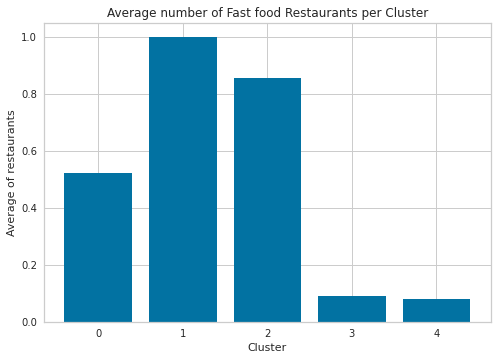

In [56]:
cluster = list(range(0,kclusters))
plt.bar(cluster, cluster_means, align='center', )
plt.xticks(cluster)
plt.ylabel('Average of restaurants')
plt.xlabel('Cluster')
plt.title('Average number of Fast food Restaurants per Cluster')

plt.show()

#### Explore the best two clusters  

In our analysis until this point, we have found the best two clusters that have the highest number of fast food restaurants on average. It will be best to open a new fast food restaurant in a location where of fast food restaurants are located but we also want to avoid opening a fast food restaurant in a neighborhood that already has one. The aim of this section is to find which neighborhood in the two clusters found would be the best neighborhood for the restaurant. Simply put, we want to find a neighborhood in these clusters that currently has no fast food and which has the average farthest distance from other neighborhoods with a fast food restaurant. To achieve this, we find the list of neighborhoods with a fast food restaurant in the best clusters, and also the list of those with no fast food restaurants. We then find the average distance between set. For neighborhoods with multiple fast food restaurants, this is taken into account by multiplying the distance by the number of restaurants.

In [57]:
# Get neighborhoods with and without restaurants
best1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == best_cluster_index1, toronto_merged.columns[[0,1,2,3,4] + list(range(5, toronto_merged.shape[1]))]]
best2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == best_cluster_index2, toronto_merged.columns[[0,1,2,3,4] + list(range(5, toronto_merged.shape[1]))]]

best_clusters = pd.concat([best1, best2],axis=0 ).reset_index(drop=True)
no_restaurant = best_clusters[best_clusters['No_of_restaurants']==0].reset_index(drop=True)
has_restaurant = best_clusters[best_clusters['No_of_restaurants']!=0].reset_index(drop=True)
#print(has_restaurant)
#print(no_restaurant)

In [58]:
# Get the distance between both set as a matrix
from scipy.spatial import distance_matrix
distances = pd.DataFrame(distance_matrix(no_restaurant[['Latitude', 'Longitude']], has_restaurant[['Latitude', 'Longitude']]))
distances

,0,1,2,3,4,5,6
0,0.130261,0.016319,0.006672,0.009196,0.007521,0.005496,0.005091
1,0.136396,0.023277,0.013610,0.012667,0.008613,0.007358,0.002267
2,0.127290,0.008964,0.008482,0.007900,0.012240,0.012344,0.017024
3,0.136252,0.021104,0.021480,0.015704,0.019432,0.020843,0.026097
4,0.142129,0.025084,0.016587,0.010154,0.006364,0.007632,0.008904
5,0.134904,0.017453,0.009351,0.003134,0.001437,0.002474,0.007697


In [59]:
# Add weightage to neighbourhoods with multiple fast food restuarants
for x in range(0,len(distances.loc[0,])):
    distances[x] = distances[x]*has_restaurant.loc[x,'No_of_restaurants']
distances

,0,1,2,3,4,5,6
0,0.521045,0.032639,0.013343,0.009196,0.007521,0.005496,0.005091
1,0.545583,0.046555,0.027221,0.012667,0.008613,0.007358,0.002267
2,0.509161,0.017929,0.016965,0.007900,0.012240,0.012344,0.017024
3,0.545008,0.042208,0.042959,0.015704,0.019432,0.020843,0.026097
4,0.568515,0.050167,0.033174,0.010154,0.006364,0.007632,0.008904
5,0.539618,0.034906,0.018701,0.003134,0.001437,0.002474,0.007697


In [60]:
distances.columns = list(has_restaurant['Neighborhood'])
distances.index = no_restaurant['Neighborhood']
distances

,"Fairview, Henry Farm, Oriole",Church and Wellesley,"Garden District, Ryerson","Richmond, Adelaide, King","Toronto Dominion Centre, Design Exchange","Commerce Court, Victoria Hotel",Enclave of M5E
Neighborhood,,,,,,,
St. James Town,0.521045,0.032639,0.013343,0.009196,0.007521,0.005496,0.005091
Berczy Park,0.545583,0.046555,0.027221,0.012667,0.008613,0.007358,0.002267
Central Bay Street,0.509161,0.017929,0.016965,0.007900,0.012240,0.012344,0.017024
"Kensington Market, Chinatown, Grange Park",0.545008,0.042208,0.042959,0.015704,0.019432,0.020843,0.026097
"Harbourfront East, Union Station, Toronto Islands",0.568515,0.050167,0.033174,0.010154,0.006364,0.007632,0.008904
"First Canadian Place, Underground city",0.539618,0.034906,0.018701,0.003134,0.001437,0.002474,0.007697


In [61]:
# Get the best neighborhood
distance_means= [distances.loc[neighborhood,].mean() for neighborhood in distances.index]
best_neigh_index1 = distance_means.index(max(distance_means))
print(max(distance_means),best_neigh_index1)
print("The best neighbourhood with no fast food and farthest distance from existing ones is: ", no_restaurant.loc[best_neigh_index1,'Neighborhood'], \
      "in cluster", no_restaurant.loc[best_neigh_index1,'Cluster Labels'])

# Get the second best neighborhood

# get second best cluster
distance_means2 = list(distance_means[:best_neigh_index1]+[0.0]+distance_means[best_neigh_index1+1:])
best_neigh_index2 = distance_means2.index(max(distance_means2))
print(max(distance_means2),best_neigh_index2)
print("The second best location with no fast food and farthest distance of exisitng ones is: ", no_restaurant.loc[best_neigh_index2,'Neighborhood'], \
      "in cluster", no_restaurant.loc[best_neigh_index2,'Cluster Labels'])


0.10175018583588531 3
The best neighbourhood with no fast food and farthest distance from existing ones is:  Kensington Market, Chinatown, Grange Park in cluster 1
0.09784415607139382 4
The second best location with no fast food and farthest distance of exisitng ones is:  Harbourfront East, Union Station, Toronto Islands in cluster 2


We can visualize the average distance of the neighborhoods with no FF restaurants to others with an existing fast food restaurants in the best two clusters:

In [62]:
no_restaurant[['Neighborhood','Cluster Labels']]
              

,Neighborhood,Cluster Labels
0,St. James Town,1
1,Berczy Park,1
2,Central Bay Street,1
3,"Kensington Market, Chinatown, Grange Park",1
4,"Harbourfront East, Union Station, Toronto Islands",2
5,"First Canadian Place, Underground city",2


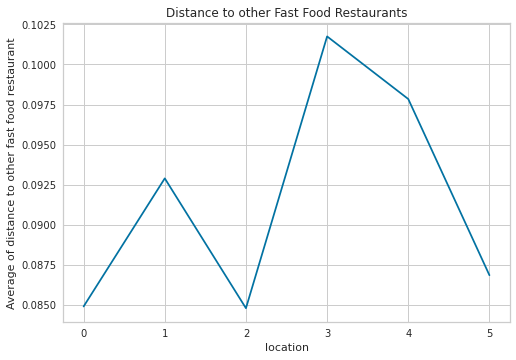

In [63]:
#PLot the average distance to other restaurants in the two clusters being considered
locations = list(range(0,len(distance_means)))
plt.plot(locations, distance_means)
plt.xticks(locations)
plt.ylabel('Average of distance to other fast food restaurant')
plt.xlabel('location')
plt.title('Distance to other Fast Food Restaurants')

plt.show()

<a id='results'></a>
## 4. Results and Discussion
As shown above, the neighborhood - Kensington Market, Chinatown, Grange Park in cluster 3 is the best neighborhood to open a new fast food restaurant. The neighborhood with the second highest distance may also be considered if there are other factors that are being taken into account. So the best two locations to open a new fast food restaurant are shown below.

In [64]:
no_restaurant.loc[[best_neigh_index1,best_neigh_index2],]

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,No_of_restaurants
3,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",43.653206,-79.400049,1,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0
4,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,2,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,College Stadium,0.0


In order to visualize these locations in contrast to existing fast food restaurants, the map of all the clustered neighborhoods and the neighborhood with at least one fast food restaurant is shown.

In [65]:
all_has_restaurant = toronto_merged[toronto_merged['No_of_restaurants']!=0].reset_index(drop=True)

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add all neighborhood/clusters to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.8).add_to(map_clusters)

# Add makers to show the best locations for a new restuarant to the map (in RED) 
loc_index=1
for lat, lon in zip(no_restaurant.loc[[best_neigh_index1,best_neigh_index2],'Latitude'], no_restaurant.loc[[best_neigh_index1,best_neigh_index2],'Longitude']):
    folium.Marker(
        [lat, lon],
        popup= "best location {}".format(loc_index),
        icon=folium.Icon(color="red", icon='home'),
    ).add_to(map_clusters)
    loc_index=loc_index+1
#Add markers to show with existing restaurants (in Blue)
for lat, lon, num in zip(all_has_restaurant['Latitude'], all_has_restaurant['Longitude'], all_has_restaurant['No_of_restaurants']):
    folium.Marker(
        [lat, lon],
        popup= "{} existing fast food restaurants".format(int(num))
       ).add_to(map_clusters)
#add marker for the actual restaurants on the map
#for lat, lon, venue in zip(restaurants['Venue Latitude'], restaurants['Venue Longitude'], restaurants['Venue']):
#    label = folium.Popup(str(venue), parse_html=True)
#    folium.Marker(
#        [lat, lon],
#        popup=label    
#    ).add_to(map_clusters)
           
map_clusters

As seen in the analysis the best neighborhoods to open a fast food restuarant based on the location data available is in the Kensington Market, Chinatown, Grange Park neighborhood or the Harbourfront East, Union Station, Toronto Islands neighborhood. Looking at the map, these two locations seems indeed like the best options as they are close to many various other locations but still away from other neighbourhoods that already have one or more fast food restaurants. 

<a id='conclusion'></a>
## 5. Conclusion
The goal of this project was to find a neighborhood that was most suitable to open a new fast food (FF) restaurant. We used the information about the neighborhoods in Toronto as well as data from Foursquare about these neighborhoods to find the neighborhoods that are most similar by generating clusters of neighborhoods. Neighborhoods with a high number of existing restaurants typically implies that there is demand for fast food in such neighborhood. This was useful in determining which cluster a new FF restaurant would be best located. As with any business, our client is also interested in limiting the amount of competition that her new business would have to face while starting out. Our approach for finding the best neighborhood for a new FF restaurant involved evaluating the distance to existing fast foods in the identified neighbourhood before arriving at a conclusion on the best two neighborhoods in which the fast food restaurant may be opened. 

It is important to note that this decision is based on the location information only. As mentioned earlier, opening a business involves a lot of factors and there may be other factors that are important to the client that may need to be further explored for each of these neighborhoods. The recommendation to the client would be to consider these top two neighborhoods identified.